# Import Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Import Dataset

In [54]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
df_catalysis_dataset.dtypes

M1                    object
M1_atom_number         int64
M2                    object
M2_atom_number         int64
M3                    object
M3_atom_number         int64
Support               object
Support_ID             int64
M2_mol               float64
M3_mol               float64
M1_mol_percentage      int64
M2_mol_percentage      int64
M3_mol_percentage      int64
Temp                   int64
Total_flow             int64
Ar_flow              float64
CH4_flow             float64
O2_flow              float64
CT                   float64
CH4/O2                 int64
CH4_conv             float64
C2y                  float64
C2H6y                float64
C2H4y                float64
COy                  float64
CO2y                 float64
C2s                  float64
C2H6s                float64
C2H4s                float64
COs                  float64
CO2s                 float64
dtype: object

# Define Variables

In [55]:
x = df_catalysis_dataset[["Ar_flow", "CH4_flow", "O2_flow", "CT", "M2_mol", "M3_mol"]].values
print(x)

[[ 1.5    5.7    2.8    0.75   0.37   0.185]
 [ 2.3    8.5    4.3    0.5    0.37   0.185]
 [ 3.    11.3    5.7    0.38   0.37   0.185]
 ...
 [ 7.     2.6    0.4    0.75   0.37   0.   ]
 [10.5    3.9    0.6    0.5    0.37   0.   ]
 [14.     5.1    0.9    0.38   0.37   0.   ]]


In [56]:
# CH4_conv, C2y, COy
y = df_catalysis_dataset["COy"].values
print(y)

[30.82 31.29 21.62 ...  1.5   1.61  2.15]


# Split the dataset into training and test

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train the model on training set

In [58]:
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

# Predict

In [59]:
y_pred = ml.predict(x_test)
print(y_pred)

[10.19990014 18.49770267  3.8583983  ... 21.21607837  6.21247162
 19.46004497]


# Evaluate

In [60]:
r2_score(y_test, y_pred)

0.31133855180190684

Text(0.5, 1.0, 'Actual vs. Predicted')

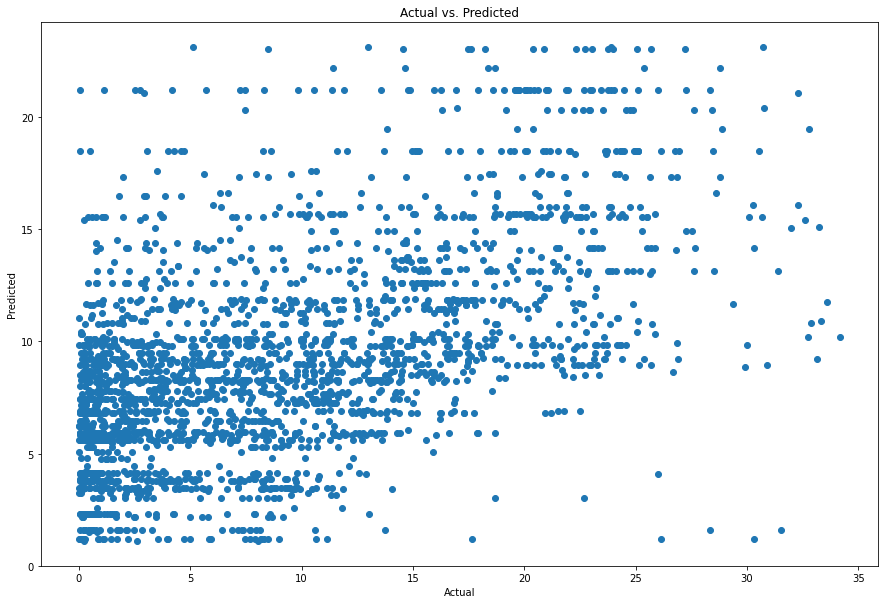

In [61]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# Predicted Values

In [62]:
pred_y_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_y_df[0:20]

Actual Value  Predicted Value  Difference
0          32.72        10.199900   22.520100
1           0.06        18.497703  -18.437703
2           6.38         3.858398    2.521602
3          13.06         8.137156    4.922844
4           0.22        15.425281  -15.205281
5          30.67        15.558982   15.111018
6           2.77         3.858398   -1.088398
7          19.17        12.603042    6.566958
8          25.63        17.349966    8.280034
9           2.79         9.850400   -7.060400
10         13.40         8.285365    5.114635
11         10.29         8.233027    2.056973
12          8.93         6.466401    2.463599
13         14.96        18.497703   -3.537703
14         18.79        16.634120    2.155880
15         19.65        13.640056    6.009944
16          1.49         6.212472   -4.722472
17          9.49         8.285365    1.204635
18          0.77        14.053068  -13.283068
19          2.37         5.078774   -2.708774